In [1]:
# Importe
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report

In [2]:
song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

In [3]:
song_data = song_data[["Genre","Lyrics","song_text_processed","Text_Length"]]
song_data = song_data.groupby('Genre').sample(1000).reset_index(drop=True)

### Textlänge

Genre
Hip-Hop       2517.567
Pop           1477.368
R&B           1271.140
Metal         1092.635
Electronic    1048.697
Folk          1020.010
Rock           996.783
Indie          978.164
Country        932.851
Jazz           857.254
Name: Text_Length, dtype: float64


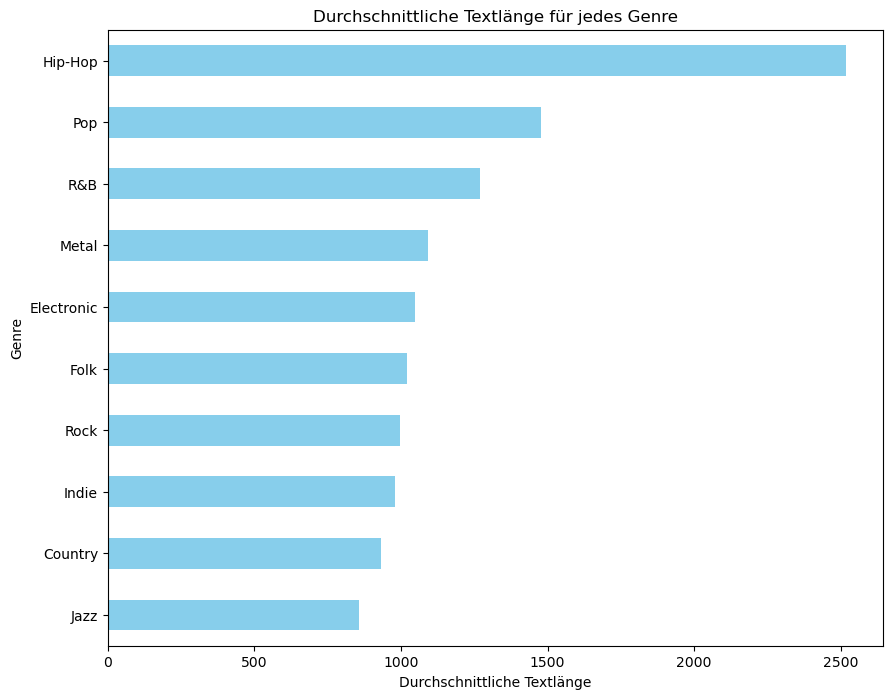

In [4]:
# Berechne die durchschnittliche Textlänge für jedes Genre
average_text_length_per_genre = song_data.groupby('Genre')['Text_Length'].mean().sort_values(ascending=False)


# Ausgabe der durchschnittlichen Textlängen für jedes Genre
print(average_text_length_per_genre)

plt.figure(figsize=(10, 8))
average_text_length_per_genre.plot(kind='barh', color='skyblue')
plt.title('Durchschnittliche Textlänge für jedes Genre')
plt.xlabel('Durchschnittliche Textlänge')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Kehre die Reihenfolge auf der Y-Achse um, damit das Genre mit der längsten durchschnittlichen Textlänge oben ist
plt.show()


### Anzahl der Satzzeichen

Genre
Hip-Hop       92.447
Pop           47.126
R&B           40.778
Metal         31.527
Electronic    30.251
Rock          28.953
Folk          26.645
Jazz          26.567
Indie         24.883
Country       23.094
Name: punctuation_count, dtype: float64


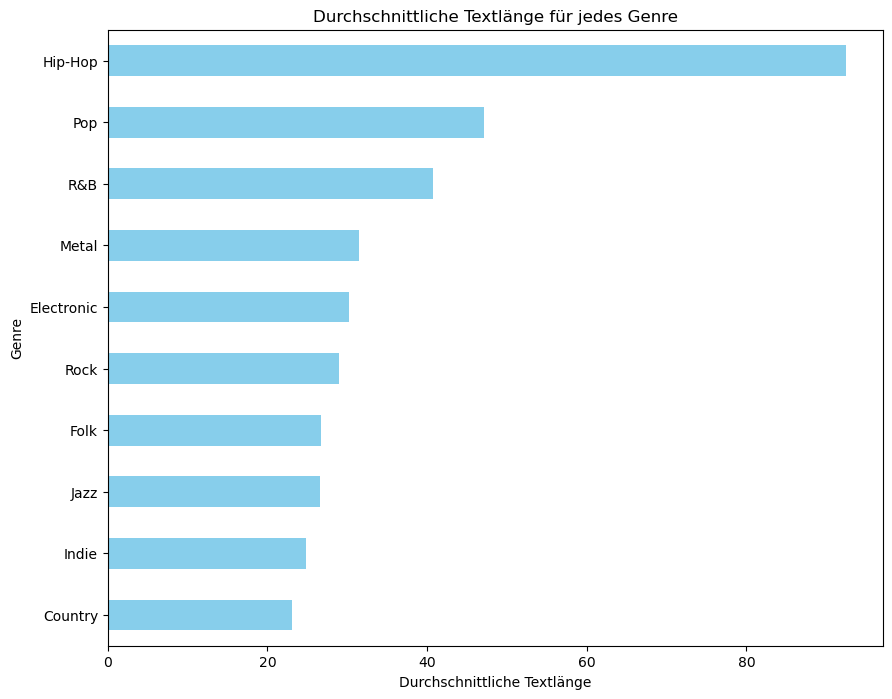

In [5]:
# Angenommen, 'unprocessed_lyrics' ist die Spalte mit den unverarbeiteten Songtexten

# Schritt 1: Definiere eine Funktion, die die Anzahl der Satzzeichen in einem Text zählt
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Schritt 2: Wende diese Funktion auf jeden Songtext an, um die Anzahl der Satzzeichen zu zählen
song_data['punctuation_count'] = song_data['Lyrics'].apply(count_punctuation)

# Schritt 3: Berechne die durchschnittliche Anzahl von Satzzeichen für jedes Genre
average_punctuation_per_genre = song_data.groupby('Genre')['punctuation_count'].mean().sort_values(ascending=False)

# Ausgabe der durchschnittlichen Anzahl von Satzzeichen für jedes Genre
print(average_punctuation_per_genre)

plt.figure(figsize=(10, 8))
average_punctuation_per_genre.plot(kind='barh', color='skyblue')
plt.title('Durchschnittliche Textlänge für jedes Genre')
plt.xlabel('Durchschnittliche Textlänge')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Kehre die Reihenfolge auf der Y-Achse um, damit das Genre mit der längsten durchschnittlichen Textlänge oben ist
plt.show()

### Art des Satzzeichens

In [6]:
def count_punctuation_types(text):
    punctuation_counts = Counter(char for char in text if char in string.punctuation)
    return punctuation_counts

# Beispielannahme: song_data ist deine DataFrame und enthält Spalten 'Genre' und 'unprocessed_lyrics'

# Wende die Funktion an und erstelle eine neue Spalte für die Zählung der Satzzeichenarten
song_data['punctuation_counts'] = song_data['Lyrics'].apply(count_punctuation_types)

# Initialisiere ein Dictionary, um die aggregierten Zählungen für jedes Genre zu speichern
aggregated_counts_per_genre = {genre: Counter() for genre in song_data['Genre'].unique()}

# Aggregiere die Zählungen für jedes Genre
for _, row in song_data.iterrows():
    aggregated_counts_per_genre[row['Genre']].update(row['punctuation_counts'])

# Berechne die Anzahl der Songs pro Genre
songs_per_genre = song_data['Genre'].value_counts()

# Berechne die durchschnittlichen Zählungen
average_counts_per_genre = {}
for genre, counts in aggregated_counts_per_genre.items():
    average_counts = {punct: count / songs_per_genre[genre] for punct, count in counts.items()}
    average_counts_per_genre[genre] = average_counts

# Optional: Ausgabe der durchschnittlichen Zählungen für jedes Genre
for genre, counts in average_counts_per_genre.items():
    print(f"Genre: {genre}")
    for punct, avg_count in counts.items():
        print(f"  {punct}: {avg_count:.2f}")
    print("\n")

Genre: Country
  ': 12.60
  ,: 5.32
  [: 0.29
  ]: 0.29
  ": 0.31
  ?: 0.45
  .: 2.04
  -: 0.69
  (: 0.40
  ): 0.39
  :: 0.10
  /: 0.03
  ;: 0.05
  !: 0.09
  `: 0.01
  &: 0.01
  *: 0.01
  +: 0.00
  @: 0.00
  #: 0.02


Genre: Electronic
  !: 0.65
  ?: 1.22
  ,: 9.29
  ': 11.34
  .: 3.12
  -: 1.30
  ": 0.33
  (: 1.08
  ): 1.08
  `: 0.03
  [: 0.21
  ]: 0.21
  :: 0.24
  $: 0.00
  /: 0.04
  ;: 0.04
  &: 0.03
  *: 0.02
  %: 0.00
  #: 0.00
  ~: 0.00
  {: 0.00
  _: 0.03


Genre: Folk
  .: 2.66
  ,: 8.41
  ': 10.55
  ?: 1.08
  -: 1.15
  [: 0.18
  ]: 0.18
  ": 0.77
  (: 0.50
  ): 0.50
  `: 0.02
  >: 0.00
  &: 0.02
  !: 0.41
  /: 0.01
  \: 0.00
  :: 0.11
  ;: 0.08
  =: 0.01
  _: 0.00
  *: 0.00


Genre: Hip-Hop
  [: 2.15
  ]: 2.15
  .: 4.98
  (: 4.04
  ): 4.04
  ': 32.10
  ,: 30.51
  ?: 3.05
  :: 0.91
  -: 3.96
  ": 1.45
  !: 1.90
  &: 0.14
  ;: 0.13
  $: 0.07
  *: 0.41
  /: 0.18
  >: 0.01
  {: 0.06
  }: 0.06
  #: 0.01
  +: 0.03
  @: 0.00
  `: 0.01
  ~: 0.02
  %: 0.01
  _: 0.05
  ^: 0.01
  =: 0.00

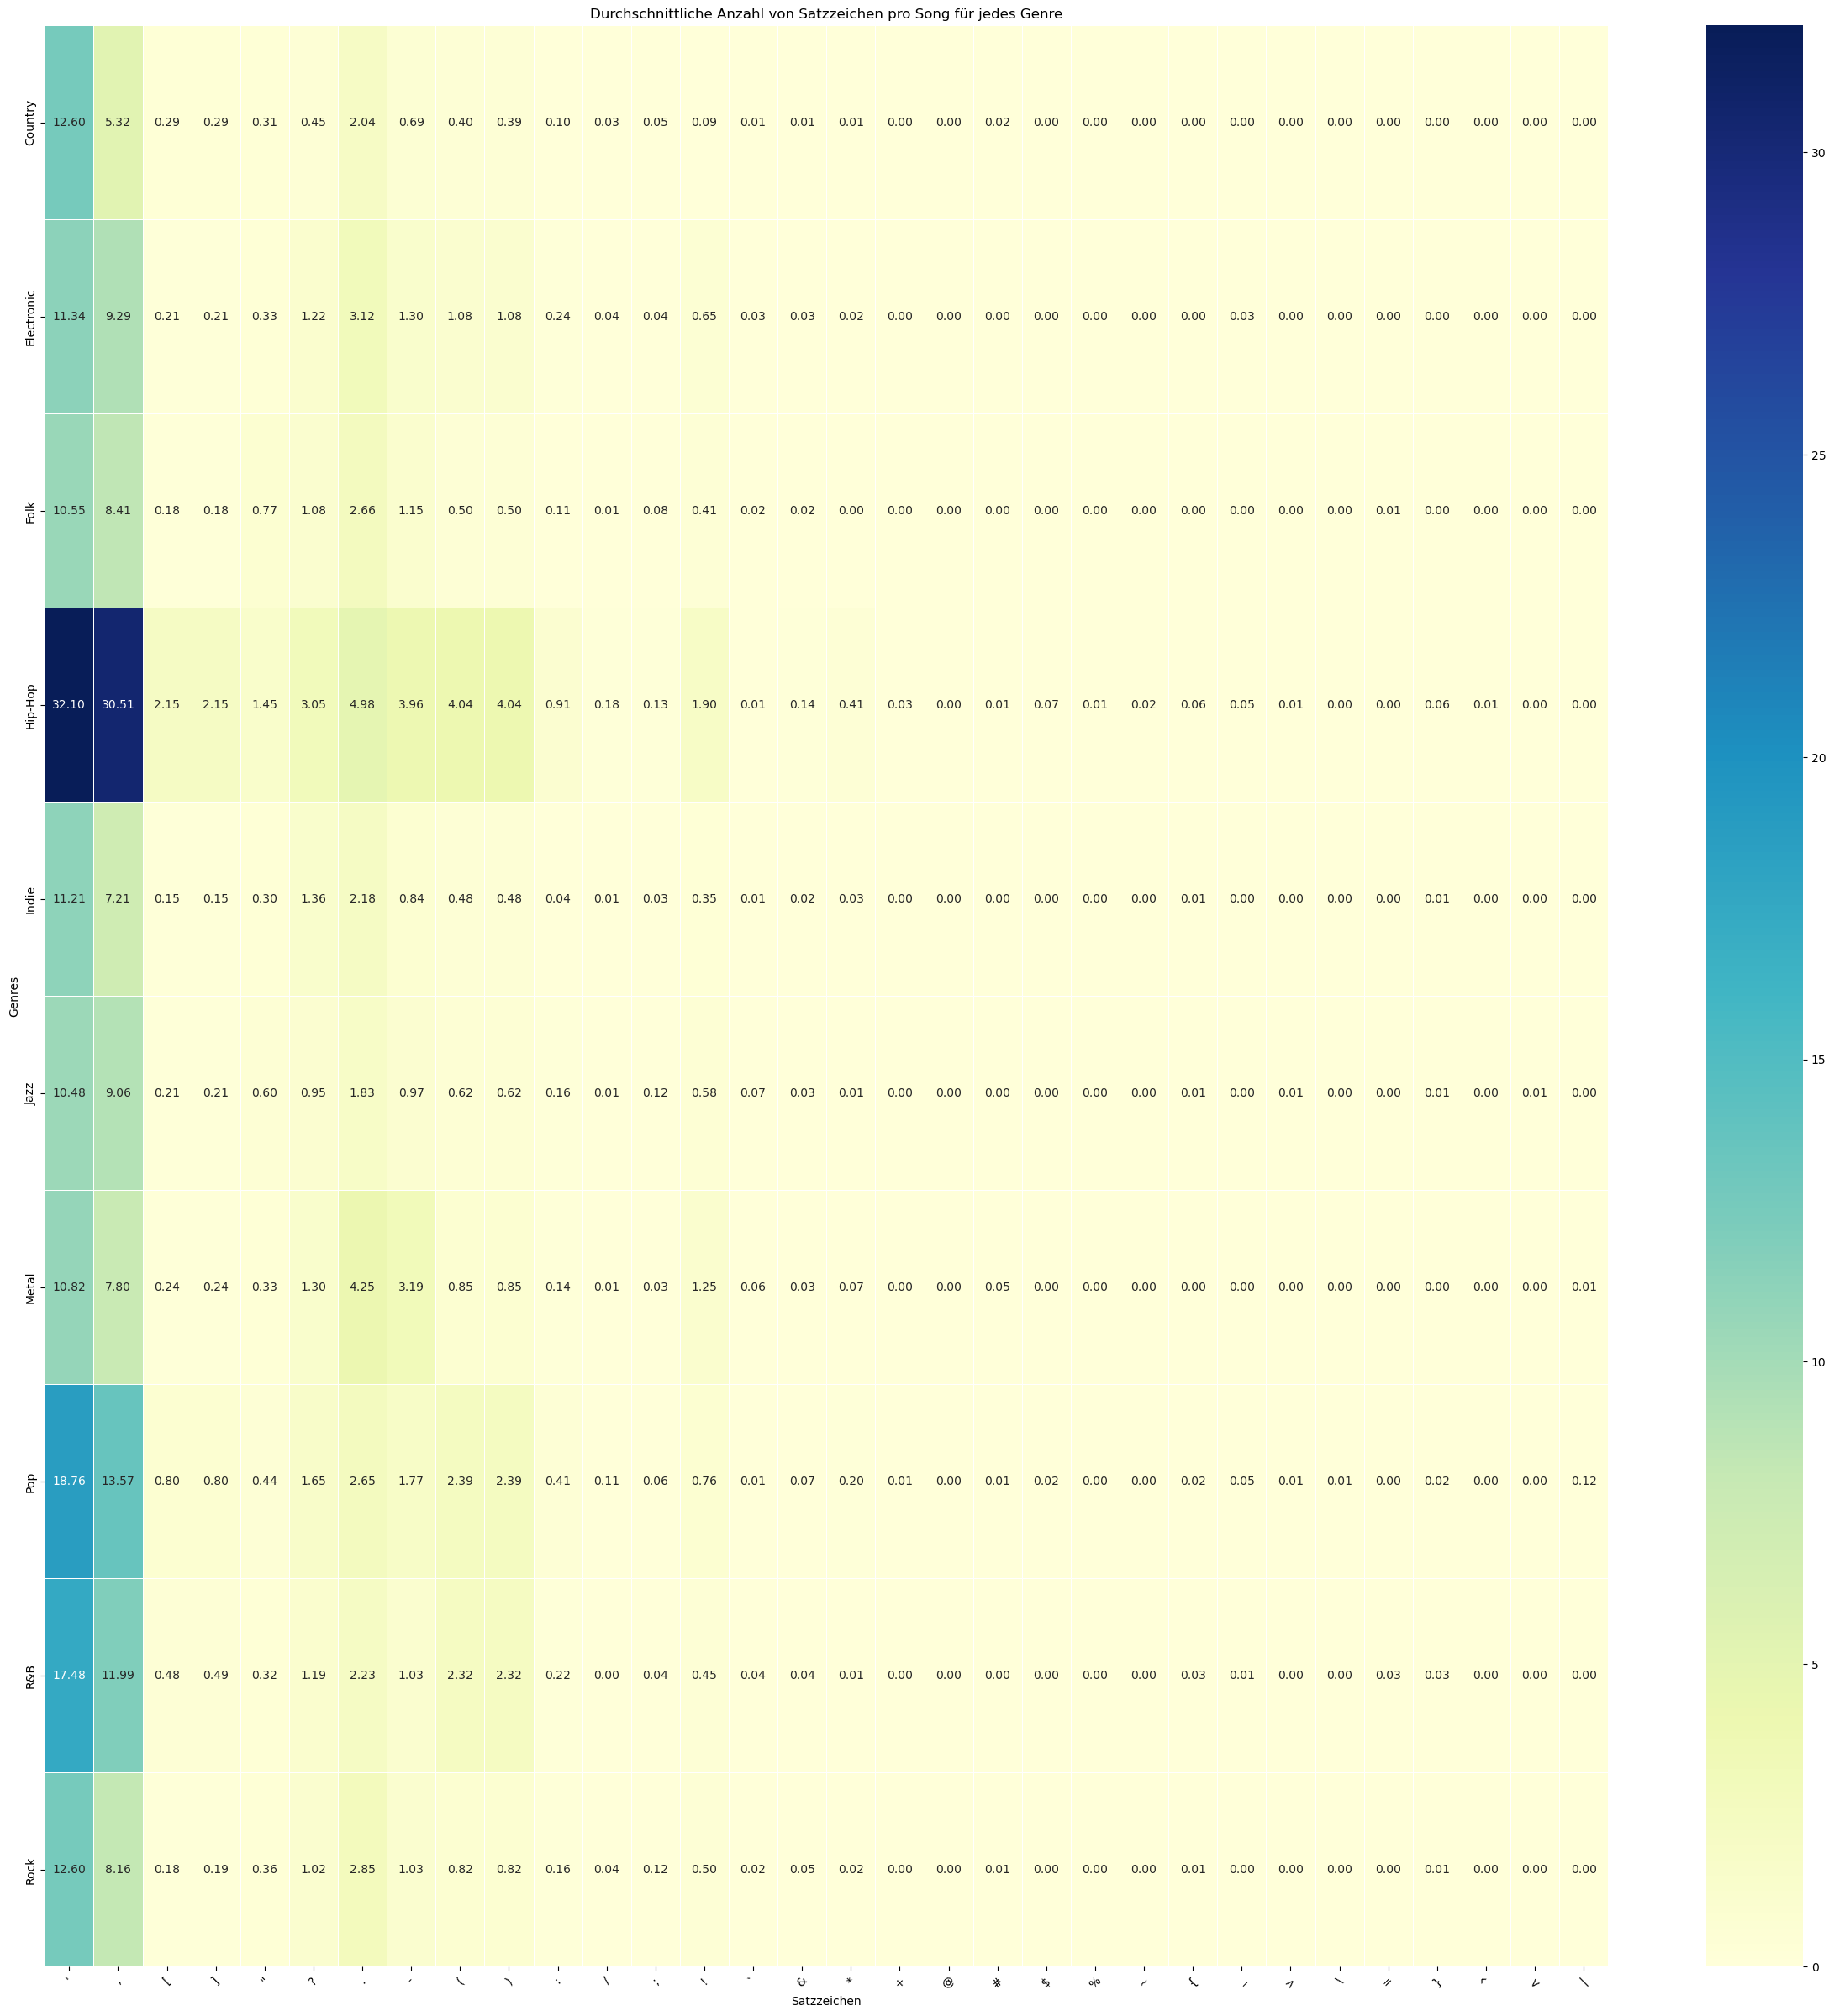

In [7]:
# Konvertiere das Dictionary der durchschnittlichen Zählungen in einen DataFrame
df_average_counts = pd.DataFrame.from_dict(average_counts_per_genre, orient='index').fillna(0)

plt.figure(figsize=(30, 30))
sns.heatmap(df_average_counts, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Durchschnittliche Anzahl von Satzzeichen pro Song für jedes Genre')
plt.xlabel('Satzzeichen')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.show()